In [1]:
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.neural_network import MLPClassifier as mlp_classifier

warnings.filterwarnings('ignore')

In [2]:
print("----------------Reading the Data-------------------------")
PATH = os.getcwd()
os.chdir('Alphabets/')

X_train = pd.read_csv('train.csv', sep=',', header=None, index_col=False)
X_test = pd.read_csv('test.csv', sep=',', header=None, index_col=False)
np.random.shuffle(X_train.to_numpy())
train_class = X_train[X_train.columns[-1]]
test_actual_class = X_test[X_test.columns[-1]]

X_train = X_train.drop(X_train.columns[-1], axis=1)
X_test = X_test.drop(X_test.columns[-1], axis=1)

print("----------------Data Reading completed-------------------")

os.chdir('../')

X_train = X_train/255
X_test = X_test/255

m = X_train.shape[0] # Number of Training Samples
n = X_train.shape[1] # Number of input features

print("The total number of training samples = {}".format(m))
print("The number of features = {}".format(n))

----------------Reading the Data-------------------------
----------------Data Reading completed-------------------
The total number of training samples = 13000
The number of features = 784


In [3]:
#To get the one hot encoding of each label
print("--------Perform 1-hot encoding of class labels------------")

train_class_enc = pd.get_dummies(train_class).to_numpy()
test_actual_class_enc = pd.get_dummies(test_actual_class).to_numpy()

--------Perform 1-hot encoding of class labels------------


In [4]:
epochs = []
train_accuracy = []
test_accuracy = []
valid_accuracy = []
train_time = []
clf=[]

### Sigmoid Activation

In [71]:
#Classifier - logistic with constant LR
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', max_iter=400,
                     tol=1e-4, verbose=True))
#Classifier - logistic with early_stopping =True
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', max_iter=400,
                     early_stopping=True, tol=1e-4, verbose=True))
#Classifier - logistic with invscaling with sqrt
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='invscaling', max_iter=400,
                     tol=1e-4, verbose=True))
#Classifier - logistic with invscaling with pow(1/3)
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='invscaling', max_iter=400,
                     power_t=(1/3), tol=1e-4, verbose=True))


#Classifier ReLU with constant LR (1e-4)
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', max_iter=400,
                     tol=1e-4, verbose=True))
#Classifier ReLU with constant LR (1e-6)
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', max_iter=400,
                     tol=1e-6, verbose=True))
#Classifier ReLU with constant LR (1e-6) with early stopping
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='constant', max_iter=400,
                     early_stopping=True, tol=1e-6, verbose=True))
#Classifier ReLU with constant LR (1e-6) with invscaling sqrt
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='invscaling', max_iter=400,
                     tol=1e-6, verbose=True))
#Classifier ReLU with constant LR (1e-6) with invscaling pow(1/3)
clf.append(mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='invscaling', max_iter=400,
                     power_t=(1/3), tol=1e-6, verbose=True))

In [73]:
for i in range(len(clf)):
    start =time.time()
    clf[i].fit(X_train, train_class_enc)
    end = time.time()
    epochs.append(clf[i].n_iter_)
    train_accuracy.append(clf[i].score(X_train, train_class_enc)*100)
    test_accuracy.append(clf[i].score(X_test, test_actual_class_enc)*100)
    train_time.append(end-start)

Iteration 1, loss = 4.39657590
Iteration 2, loss = 3.71217380
Iteration 3, loss = 2.55477885
Iteration 4, loss = 1.82249887
Iteration 5, loss = 1.42661593
Iteration 6, loss = 1.18147019
Iteration 7, loss = 1.01453049
Iteration 8, loss = 0.88970916
Iteration 9, loss = 0.79782116
Iteration 10, loss = 0.71824045
Iteration 11, loss = 0.65070040
Iteration 12, loss = 0.59544737
Iteration 13, loss = 0.54298830
Iteration 14, loss = 0.50012259
Iteration 15, loss = 0.45860232
Iteration 16, loss = 0.42214258
Iteration 17, loss = 0.39042106
Iteration 18, loss = 0.36076863
Iteration 19, loss = 0.33359145
Iteration 20, loss = 0.31101551
Iteration 21, loss = 0.28558857
Iteration 22, loss = 0.26732505
Iteration 23, loss = 0.24695319
Iteration 24, loss = 0.22988228
Iteration 25, loss = 0.21498075
Iteration 26, loss = 0.19882505
Iteration 27, loss = 0.18647809
Iteration 28, loss = 0.17370369
Iteration 29, loss = 0.16128112
Iteration 30, loss = 0.15129465
Iteration 31, loss = 0.14131756
Iteration 32, los

Iteration 4, loss = 4.18438605
Iteration 5, loss = 4.18107421
Iteration 6, loss = 4.17840663
Iteration 7, loss = 4.17613849
Iteration 8, loss = 4.17415907
Iteration 9, loss = 4.17237027
Iteration 10, loss = 4.17073630
Iteration 11, loss = 4.16923612
Iteration 12, loss = 4.16782614
Iteration 13, loss = 4.16649870
Iteration 14, loss = 4.16521938
Iteration 15, loss = 4.16401307
Iteration 16, loss = 4.16284685
Iteration 17, loss = 4.16172032
Iteration 18, loss = 4.16063626
Iteration 19, loss = 4.15957294
Iteration 20, loss = 4.15853989
Iteration 21, loss = 4.15753405
Iteration 22, loss = 4.15654766
Iteration 23, loss = 4.15557807
Iteration 24, loss = 4.15462467
Iteration 25, loss = 4.15369194
Iteration 26, loss = 4.15276776
Iteration 27, loss = 4.15185880
Iteration 28, loss = 4.15095383
Iteration 29, loss = 4.15006565
Iteration 30, loss = 4.14918646
Iteration 31, loss = 4.14831216
Iteration 32, loss = 4.14745183
Iteration 33, loss = 4.14658793
Iteration 34, loss = 4.14574079
Iteration 35, 

Iteration 256, loss = 3.95807039
Iteration 257, loss = 3.95715441
Iteration 258, loss = 3.95623944
Iteration 259, loss = 3.95532244
Iteration 260, loss = 3.95440588
Iteration 261, loss = 3.95348798
Iteration 262, loss = 3.95257004
Iteration 263, loss = 3.95165328
Iteration 264, loss = 3.95073581
Iteration 265, loss = 3.94981854
Iteration 266, loss = 3.94889842
Iteration 267, loss = 3.94798079
Iteration 268, loss = 3.94706332
Iteration 269, loss = 3.94614314
Iteration 270, loss = 3.94522305
Iteration 271, loss = 3.94430494
Iteration 272, loss = 3.94338391
Iteration 273, loss = 3.94246527
Iteration 274, loss = 3.94154474
Iteration 275, loss = 3.94062464
Iteration 276, loss = 3.93970438
Iteration 277, loss = 3.93878534
Iteration 278, loss = 3.93786529
Iteration 279, loss = 3.93694289
Iteration 280, loss = 3.93602124
Iteration 281, loss = 3.93510103
Iteration 282, loss = 3.93418089
Iteration 283, loss = 3.93325909
Iteration 284, loss = 3.93233764
Iteration 285, loss = 3.93141796
Iteration 

Iteration 108, loss = 2.50599272
Iteration 109, loss = 2.49884147
Iteration 110, loss = 2.49178515
Iteration 111, loss = 2.48483455
Iteration 112, loss = 2.47780173
Iteration 113, loss = 2.47085404
Iteration 114, loss = 2.46394333
Iteration 115, loss = 2.45699478
Iteration 116, loss = 2.45013902
Iteration 117, loss = 2.44326913
Iteration 118, loss = 2.43648600
Iteration 119, loss = 2.42968859
Iteration 120, loss = 2.42291198
Iteration 121, loss = 2.41615148
Iteration 122, loss = 2.40934012
Iteration 123, loss = 2.40267632
Iteration 124, loss = 2.39597161
Iteration 125, loss = 2.38929682
Iteration 126, loss = 2.38267524
Iteration 127, loss = 2.37602131
Iteration 128, loss = 2.36936198
Iteration 129, loss = 2.36284175
Iteration 130, loss = 2.35619963
Iteration 131, loss = 2.34970430
Iteration 132, loss = 2.34314239
Iteration 133, loss = 2.33657702
Iteration 134, loss = 2.33006618
Iteration 135, loss = 2.32359667
Iteration 136, loss = 2.31711320
Iteration 137, loss = 2.31063117
Iteration 

Iteration 357, loss = 1.44859964
Iteration 358, loss = 1.44633511
Iteration 359, loss = 1.44416446
Iteration 360, loss = 1.44197888
Iteration 361, loss = 1.43979706
Iteration 362, loss = 1.43752859
Iteration 363, loss = 1.43536198
Iteration 364, loss = 1.43316319
Iteration 365, loss = 1.43104277
Iteration 366, loss = 1.42881290
Iteration 367, loss = 1.42667629
Iteration 368, loss = 1.42455664
Iteration 369, loss = 1.42239869
Iteration 370, loss = 1.42026365
Iteration 371, loss = 1.41816598
Iteration 372, loss = 1.41602118
Iteration 373, loss = 1.41392596
Iteration 374, loss = 1.41177423
Iteration 375, loss = 1.40967604
Iteration 376, loss = 1.40759647
Iteration 377, loss = 1.40554628
Iteration 378, loss = 1.40346016
Iteration 379, loss = 1.40133793
Iteration 380, loss = 1.39931798
Iteration 381, loss = 1.39725402
Iteration 382, loss = 1.39521875
Iteration 383, loss = 1.39318338
Iteration 384, loss = 1.39108893
Iteration 385, loss = 1.38905098
Iteration 386, loss = 1.38708769
Iteration 

Iteration 52, loss = 0.69602286
Iteration 53, loss = 0.69511840
Iteration 54, loss = 0.69422098
Iteration 55, loss = 0.69333600
Iteration 56, loss = 0.69250567
Iteration 57, loss = 0.69160454
Iteration 58, loss = 0.69080745
Iteration 59, loss = 0.68998943
Iteration 60, loss = 0.68914975
Iteration 61, loss = 0.68837447
Iteration 62, loss = 0.68764855
Iteration 63, loss = 0.68681230
Iteration 64, loss = 0.68602941
Iteration 65, loss = 0.68528494
Iteration 66, loss = 0.68457145
Iteration 67, loss = 0.68382579
Iteration 68, loss = 0.68313389
Iteration 69, loss = 0.68239635
Iteration 70, loss = 0.68172685
Iteration 71, loss = 0.68100016
Iteration 72, loss = 0.68035316
Iteration 73, loss = 0.67965857
Iteration 74, loss = 0.67901687
Iteration 75, loss = 0.67836356
Iteration 76, loss = 0.67771402
Iteration 77, loss = 0.67704859
Iteration 78, loss = 0.67645571
Iteration 79, loss = 0.67581666
Iteration 80, loss = 0.67522065
Iteration 81, loss = 0.67458090
Iteration 82, loss = 0.67396804
Iteratio

Iteration 302, loss = 0.60344632
Iteration 303, loss = 0.60325882
Iteration 304, loss = 0.60306040
Iteration 305, loss = 0.60285005
Iteration 306, loss = 0.60268034
Iteration 307, loss = 0.60247664
Iteration 308, loss = 0.60227089
Iteration 309, loss = 0.60206295
Iteration 310, loss = 0.60188321
Iteration 311, loss = 0.60168727
Iteration 312, loss = 0.60148887
Iteration 313, loss = 0.60129474
Iteration 314, loss = 0.60111119
Iteration 315, loss = 0.60091668
Iteration 316, loss = 0.60071898
Iteration 317, loss = 0.60051741
Iteration 318, loss = 0.60034132
Iteration 319, loss = 0.60013144
Iteration 320, loss = 0.59995265
Iteration 321, loss = 0.59976942
Iteration 322, loss = 0.59957115
Iteration 323, loss = 0.59939048
Iteration 324, loss = 0.59919450
Iteration 325, loss = 0.59901060
Iteration 326, loss = 0.59881813
Iteration 327, loss = 0.59863157
Iteration 328, loss = 0.59846395
Iteration 329, loss = 0.59826171
Iteration 330, loss = 0.59807759
Iteration 331, loss = 0.59787329
Iteration 

Iteration 154, loss = 0.28866736
Iteration 155, loss = 0.28797929
Iteration 156, loss = 0.28701111
Iteration 157, loss = 0.28583846
Iteration 158, loss = 0.28508300
Iteration 159, loss = 0.28414550
Iteration 160, loss = 0.28330775
Iteration 161, loss = 0.28227194
Iteration 162, loss = 0.28139125
Iteration 163, loss = 0.28059035
Iteration 164, loss = 0.27966558
Iteration 165, loss = 0.27891245
Iteration 166, loss = 0.27792956
Iteration 167, loss = 0.27722313
Iteration 168, loss = 0.27626333
Iteration 169, loss = 0.27531938
Iteration 170, loss = 0.27436832
Iteration 171, loss = 0.27356637
Iteration 172, loss = 0.27286344
Iteration 173, loss = 0.27187830
Iteration 174, loss = 0.27130448
Iteration 175, loss = 0.27026242
Iteration 176, loss = 0.26935983
Iteration 177, loss = 0.26864111
Iteration 178, loss = 0.26799920
Iteration 179, loss = 0.26705425
Iteration 180, loss = 0.26629009
Iteration 181, loss = 0.26561516
Iteration 182, loss = 0.26476857
Iteration 183, loss = 0.26404102
Iteration 

In [30]:
clf = mlp_classifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', 
                     batch_size=100, learning_rate_init=0.3, learning_rate='invscaling', max_iter=400,
                     power_t=(1/4), tol=1e-4, verbose=True)


In [31]:
start =time.time()
clf.fit(X_train, train_class_enc)
end = time.time()

Iteration 1, loss = 4.43050756
Iteration 2, loss = 4.10995572
Iteration 3, loss = 3.91585847
Iteration 4, loss = 3.76880427
Iteration 5, loss = 3.61733016
Iteration 6, loss = 3.47240127
Iteration 7, loss = 3.35420871
Iteration 8, loss = 3.25560397
Iteration 9, loss = 3.16826830
Iteration 10, loss = 3.08959850
Iteration 11, loss = 3.01977670
Iteration 12, loss = 2.95769707
Iteration 13, loss = 2.90314175
Iteration 14, loss = 2.85330171
Iteration 15, loss = 2.80677889
Iteration 16, loss = 2.76217178
Iteration 17, loss = 2.71924428
Iteration 18, loss = 2.67564112
Iteration 19, loss = 2.63233309
Iteration 20, loss = 2.58808626
Iteration 21, loss = 2.54382897
Iteration 22, loss = 2.50082509
Iteration 23, loss = 2.45838136
Iteration 24, loss = 2.41766267
Iteration 25, loss = 2.37825881
Iteration 26, loss = 2.33876119
Iteration 27, loss = 2.29948132
Iteration 28, loss = 2.26084208
Iteration 29, loss = 2.22140945
Iteration 30, loss = 2.18211375
Iteration 31, loss = 2.14281381
Iteration 32, los

Iteration 253, loss = 0.24812404
Iteration 254, loss = 0.24702899
Iteration 255, loss = 0.24542399
Iteration 256, loss = 0.24432685
Iteration 257, loss = 0.24297936
Iteration 258, loss = 0.24188515
Iteration 259, loss = 0.24065773
Iteration 260, loss = 0.23925629
Iteration 261, loss = 0.23800089
Iteration 262, loss = 0.23675926
Iteration 263, loss = 0.23577028
Iteration 264, loss = 0.23444924
Iteration 265, loss = 0.23294139
Iteration 266, loss = 0.23178358
Iteration 267, loss = 0.23068842
Iteration 268, loss = 0.22959484
Iteration 269, loss = 0.22820432
Iteration 270, loss = 0.22738234
Iteration 271, loss = 0.22599333
Iteration 272, loss = 0.22484229
Iteration 273, loss = 0.22397379
Iteration 274, loss = 0.22236155
Iteration 275, loss = 0.22139183
Iteration 276, loss = 0.22067848
Iteration 277, loss = 0.21913161
Iteration 278, loss = 0.21804810
Iteration 279, loss = 0.21676596
Iteration 280, loss = 0.21585632
Iteration 281, loss = 0.21485148
Iteration 282, loss = 0.21344923
Iteration 

In [32]:
print("The time taken to train the model using MLP classifier is = {:2.3f}sec".format(end-start))
print("The test accuracy of the model ={:2.3f}%".format(clf.score(X_test, test_actual_class_enc)*100))

The time taken to train the model using MLP classifier is = 162.838sec
The test accuracy of the model =86.077%


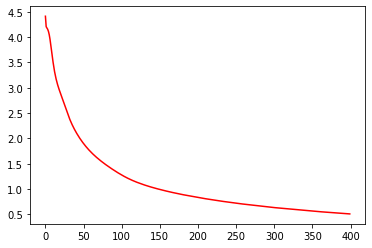

In [29]:
plt.plot(clf.loss_curve_, c='r')

In [26]:
for i in range(len(clf)):
    print("Plot for {} ".format(clf[i]))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clf[i].loss_curve_, marker='o', label='Loss')
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.set_title("Loss over Epochs with MLPClassifier")

    ax.legend()

    #plt.savefig("plots/parte/relu_e-8.png", dpi=1000, bbox_inches='tight')
    plt.show()

TypeError: object of type 'MLPClassifier' has no len()

In [ ]:
# print(clf.loss_)
#print(clf.intercepts_)
#print(clf.coefs_)
# print(clf.out_activation_)
# print(clf.classes_)
# print(clf.n_layers_)
# prit(clf.n_outputs_)
#clf.loss_curve_

TypeError: object of type 'MLPClassifier' has no len()

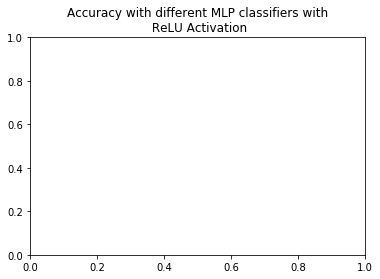

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Accuracy with different MLP classifiers with\n ReLU Activation")
x=np.arange(len(clf))
ax.plot(x, train_accuracy, marker='o', label='Train Accuracy')
ax.plot(x, test_accuracy, marker='o', label='Test Accuracy')
ax.set_xlabel("Classifier Type")
ax.set_ylabel("Accuracy (%)")

plt.legend()
#plt.savefig("plots/parte/accuracy_mlp_relu.png", dpi=1000, bbox_inches='tight')
plt.show()

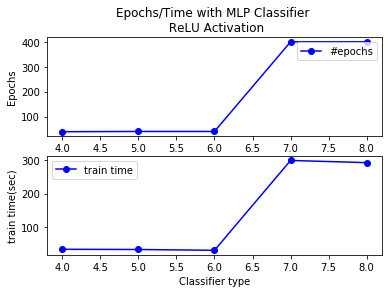

In [92]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.title("Epochs/Time with MLP Classifier \n ReLU Activation")
ax.plot(x[4:], epochs[4:], c='b', marker='o', label='#epochs')
ax.set_xlabel("Classifier Type")
ax.set_ylabel("Epochs")
ax.legend()

ax1 = fig.add_subplot(212)
ax1.plot(x[4:], train_time[4:], c='b', marker='o', label='train time')
ax1.set_xlabel("Classifier type")
ax1.set_ylabel("train time(sec)")
plt.legend()
#plt.savefig("plots/parte/epochs_time_relu.png", dpi=1000, bbox_inches='tight')
plt.show()